# Assignment 2: Regression Modeling


**Objective**: In this assignment we will build a regression model using sklearn. 

Please do not share this material on any platform or by any other means.

Important Notes:

    Make changes to the cells that have #YOUR CODE HERE or #YOUR COMMENT HERE.Do not write your answer in anywhere else other than where it says YOUR CODE HERE (or YOUR COMMENT HERE).

    Your code must run without any errors start to end. Please go to menubar, select Kernel, and restart the kernel and run all cells (Restart & Run all) before submitting your work.

    Purpose of the assignment is to assess your knowledge and command of the data mining algorithms, python programming language, and your ability to resolve common errors. Grading is based on the code and your interpretation/comments you are submitting, not the formatting of the results.

    Please use the examples as a guideline, you are not expected to have the same formatting as the example, unless it is a formatting question.

Remember, there are many ways to code that can lead to the correct answer, do not hesitate to exercise your own style and python programming coventions.

## Regression Modeling: Predicting Boston Housing Prices

HomeVal AI is a pioneering project initiated by a collaboration of urban planners, data scientists, and real estate analysts. The goal is to develop a robust model to predict housing prices in Boston. This initiative is crucial for understanding housing market trends, assisting in policy-making, and guiding potential buyers and real estate developers.

You are working as a data scientist at HomeVal AI coorporation. You are tasked with developing a regression model to predict housing prices, and to start with you have the Boston Housing price data. 

Best way to start any project is by understanding the data, and building a simple model to get your project off the ground. You will start by developing a linear regression model!

Regression is the task of predicting a continious-valued class labels (dependent variable) based on the values of other attributes (independent or predictor variables).

The file _BostonHousingExtended.csv_ contains information collected by the US Bureau of the Census concerning housing in the area of Boston, Massachusetts. The dataset includes information on 506 census housing tracts in the Boston area. The goal is to predict the median house price in new tracts based on information such as crime rate, pollution, and number of rooms. The dataset contains 12 predictors + their interactions, and the outcome variable is the median house price (MEDV).
 

**Data Set Characteristics:**  
Number of Instances: 506

Number of Attributes: 12 numeric/categorical predictive, plut their interactions. Median Value (attribute 13) is usually the target.

Original Attribute Information (in order):
- CRIM     per capita crime rate by town
- ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
- INDUS    proportion of non-retail business acres per town       
- CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
- NOX      nitric oxides concentration (parts per 10 million)
- RM       average number of rooms per dwelling
- AGE      proportion of owner-occupied units built prior to 1940
- DIS      weighted distances to five Boston employment centres       
- RAD      index of accessibility to radial highways
- TAX      full-value property-tax rate per $10,000

- PTRATIO  pupil-teacher ratio by town

- LSTAT    % lower status of the population       

- MEDV     Median value of owner-occupied homes in $1000's

Creator: Harrison, D. and Rubinfeld, D.L.
This is a copy of UCI ML housing dataset.

https://archive.ics.uci.edu/ml/machine-learning-databases/housing/

For the purposes of this assignment, the original data has been processed to include 2-way interactions of these variables (using PolynomialFeatures function), and the dataset we use has 91 features in total. 

#### Read in and review the data

In [1]:
import numpy as np
import pandas as pd
df = pd.read_csv('BostonHousingExtended.csv',header='infer')
df.head(2)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,...,70,71,72,73,74,75,76,77,78,MEDV
0,0.000000,0.18,0.067815,0,0.314815,0.577505,0.641607,0.269203,0.000000,0.208015,...,0.000000,0.000000,0.00000,0.043270,0.059749,0.018655,0.082503,0.025759,0.008042,24.0
1,0.000236,0.00,0.242302,0,0.172840,0.547998,0.782698,0.348962,0.043478,0.104962,...,0.004564,0.024052,0.00889,0.011017,0.058064,0.021462,0.306021,0.113111,0.041808,21.6


In [2]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,...,70,71,72,73,74,75,76,77,78,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,...,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,0.040544,0.113636,0.391378,0.069170,0.349167,0.521869,0.676364,0.242381,0.371713,0.422208,...,0.267554,0.271992,0.148420,0.281505,0.297077,0.161667,0.440980,0.204698,0.129599,22.532806
std,0.096679,0.233225,0.251479,0.253994,0.238431,0.134627,0.289896,0.191482,0.378576,0.321636,...,0.385317,0.322171,0.213532,0.347008,0.284685,0.194503,0.250593,0.168367,0.161755,9.197104
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000
25%,0.000851,0.000000,0.173387,0.000000,0.131687,0.445392,0.433831,0.088259,0.130435,0.175573,...,0.023399,0.048566,0.019679,0.030826,0.087624,0.026190,0.260751,0.071486,0.020748,17.025000
50%,0.002812,0.000000,0.338343,0.000000,0.314815,0.507281,0.768280,0.188949,0.173913,0.272901,...,0.061484,0.116559,0.046154,0.074475,0.142115,0.065424,0.470858,0.155388,0.070612,21.200000
75%,0.041258,0.125000,0.646628,0.000000,0.491770,0.586798,0.938980,0.369088,1.000000,0.914122,...,0.914122,0.808511,0.161454,0.835619,0.739077,0.256045,0.653689,0.311613,0.176497,25.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,0.914122,0.808511,1.000000,1.000000,0.797872,0.914122,1.000000,0.825020,1.000000,50.000000


In [3]:
df.shape

(506, 91)

In [4]:
df.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'LSTAT', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10',
       '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22',
       '23', '24', '25', '26', '27', '28', '29', '30', '31', '32', '33', '34',
       '35', '36', '37', '38', '39', '40', '41', '42', '43', '44', '45', '46',
       '47', '48', '49', '50', '51', '52', '53', '54', '55', '56', '57', '58',
       '59', '60', '61', '62', '63', '64', '65', '66', '67', '68', '69', '70',
       '71', '72', '73', '74', '75', '76', '77', '78', 'MEDV'],
      dtype='object')

## Q1: Why should the data be partitioned into training and test sets? What will the training set be used for? What will the validation set be used for?

In [ ]:
#YOUR CODE HERE



## Q2: Split the dataset into training and test datasets
Use random state = 0. 

In [ ]:
#YOUR CODE HERE


## Q3: Fit a linear regression model to the median house price (MEDV) as a function of all other features. Build a prediction model to predict the median house price given the predictors in the model.

Use random state = 0.

In [ ]:
#YOUR CODE HERE


## Q4: Apply the model you developed in Q3 on the test dataset.

In [ ]:
#YOUR CODE HERE


## Q5: How good did the model perform on the test dataset? Use the LinearRegression.score() function, calculate the MSE, R^2, and Adjusted R^2, and interpret the results.

In [ ]:
#YOUR CODE HERE


If you are on track, your graph might look like this:

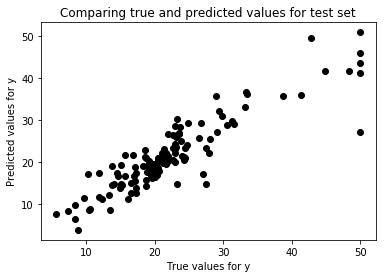

In [14]:
import matplotlib.pyplot as plt
# Comparing true versus predicted values
plt.scatter(y_test, y_pred, color='black')
plt.title('Comparing true and predicted values for test set')
plt.xlabel('True values for y')
plt.ylabel('Predicted values for y');

In [ ]:
# YOUR COMMENT HERE
# interpretation of the results


## Q6: Can regularization improve our metrics? Use Ridge and Lasso, and compare the results.

Most of the time there is discrepancy between performance on the training set and the test set, which may be an indication of under- or over-fitting. When suspected, Ridge and Lasso Regression models are used.

Ridge regression formula makes predictions the same way as ordinary least squares (linear regression). However in Ridge regression there is a penalty term employed to avoid overfitting, as a result it produces a more restricted model. When Ridge training set score is less than the Linear Regression model training set score, and Ridge test set score is higher than the Linear Regression model test set score, we can conclude that Linear Model is overfitting. If this is the case, you should proceed with Ridge model since it generalizes better (based on the higher test score).

Ridge balances model simplicity and training score (The simpler the model, the smaller the training score would be) using parameter alpha. Higher alpha values result in smaller coefficients. You can test multiple alpha values in your analysis.

Lasso also has a penalty term, and some features are entirely ignored by the model by setting coefficients of those features to 0. This is helpful in identifying which features are important , and with any reduction in feature size, the model also may become more interpretable.

In [ ]:
# YOUR CODE HERE 
# RIDGE



In [ ]:
# YOUR CODE HERE
# LASSO



In [ ]:
# YOUR COMMENT HERE
# interpretation of the results



**Assignment 2 Complete!**